In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf = pd.read_csv('C:\\Users\\USER\\jupyter_docs\\restaurant_revenue_prediction\\Data\\train.csv')
traindf


Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...   

     P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0    3.0    5    3    4    5    5    4    3    4  5653753.0  
1    3.0    0    0    0    0    0    0    0    0  6923131.0  
2    3.0    0    0    0    0    0    0    0    0  2055379.0  
3    7.5   25   12   10    6   18   12   12    6  2675511.0  
4    3.0    5    1    3    2    3    4    3    3  4316715.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...        ...  
132  3.0    0    0    0    0    0    0    0    0  5787594.0  
133  3.0    0    0    0    0    0    0    0    0  9262754.0  
134  3.0    0    0    0    0    0    0    0    0  2544857.0  
135  3.0    0    0    0    0    0    0    0    0  7217634.0  
136  3.0    0    0    0    0    0    0    0    0  6363241.0  

[137 rows x 43 columns]

In [3]:
#traindf.corr()
#traindf.isnull()
#traindf.dtypes
#traindf
#traindf.describe()
#traindf.info()

In [4]:
traindf.columns.unique() 
 

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [14]:
traindf['Open Date'] = pd.to_datetime(traindf['Open Date'])
traindf['Open Date']

0     1999-07-17
1     2008-02-14
2     2013-03-09
3     2012-02-02
4     2009-05-09
         ...    
132   2008-06-25
133   2006-10-12
134   2006-07-08
135   2010-10-29
136   2009-09-01
Name: Open Date, Length: 137, dtype: datetime64[ns]

In [15]:
#extracting opening year of restaurants from the opening dates
traindf['Year'] = traindf['Open Date'].apply(lambda x:x.year)
traindf['Year']
traindf['Year'].unique()

array([1999, 2008, 2013, 2012, 2009, 2010, 2011, 2000, 2014, 2006, 1998,
       1996, 2004, 2007, 2005, 2002, 1997], dtype=int64)

In [88]:
#Checking for cities with top revenues
CityRevenue = traindf.groupby([traindf['City Group'], traindf['City']])['revenue'].sum().sort_values(ascending=False)
CityRevenue

City Group  City          
Big Cities  İstanbul          278890598.0
            Ankara             62232711.0
            İzmir              47588137.0
Other       Bursa              20461475.0
            Samsun             16239348.0
            Adana              14684833.0
            Antalya            13925793.0
            Kayseri            13702727.0
            Sakarya            13315413.0
            Eskişehir          11873860.0
            Diyarbakır         11206054.0
            Trabzon            10568201.0
            Tekirdağ            9937412.0
            Muğla               8222258.0
            Aydın               6859597.0
            Elazığ              5525735.0
            Edirne              5444227.0
            Konya               5334513.0
            Afyonkarahisar      4952497.0
            Balıkesir           4758476.0
            Gaziantep           4316715.0
            Bolu                4263629.0
            Isparta             4015749.0
       

In [55]:
#extracting the month of opening from the opening date
import datetime as dt
#traindf['Year'] = traindf['Open Date']
traindf['Month'] = traindf['Open Date'].dt.month
traindf['Month'] = traindf['Open Date'].dt.month_name()

In [84]:
traindfDsc = traindf.sort_values(['revenue'], ascending = False)
traindfDsc =traindfDsc.drop(columns = ['month','monthname'])
traindfDsc.head()

Id  Open Date      City  City Group Type  P1   P2   P3   P4  P5  ...  \
16    16 2000-01-07  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
75    75 2005-10-15  İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...   
99    99 1999-12-18  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
100  100 2007-09-21  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
133  133 2006-10-12     İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   

     P31  P32  P33  P34  P35  P36  P37     revenue  Year      Month  
16     0    0    0    0    0    0    0  19696939.0  2000    January  
75     0    0    0    0    0    0    0  16549064.0  2005    October  
99     5    4    2    5    5    5    3  13575224.0  1999   December  
100    0    0    0    0    0    0    0   9652350.0  2007  September  
133    0    0    0    0    0    0    0   9262754.0  2006    October  

[5 rows x 45 columns]

In [85]:
#visualizing to see which month of opening has garnered in most revenue to advise on which season to open restaurant
px.histogram(traindfDsc,x= 'Month', y = 'revenue', color ='City Group', title = 'Sum of revenue generated across city groups in the opening month')

In [109]:
a = traindfDsc['revenue']
fig = px.pie(traindfDsc, values=a, names='Month', title = 'Percentage revenue by opening months')
fig.show()

##### According to the charts above, the best season to open a restaurant is between August and January

In [78]:
#After getting the month, we look at the cities with top revenues and the type of restaurant prevalent there 
px.histogram(traindfDsc, x="City", y='revenue',log_y= True, color="Type", title = 'Revenue generated by type of restaurant in each city')

#### From the chart above, we can deduce that Istanbul, Izmir and Ankara are the perfect cities for FC, while Adana, Elazigi,and Edirne are good for IL 

In [87]:
#checking to see which city group does cities with the top revenues belong
px.histogram(traindfDsc, x="City", y='revenue',log_y= True, color="City Group", title = 'Revenue generated in each city and their group')

In [105]:
a = traindfDsc['revenue']
fig = px.pie(traindfDsc, values=a, names='City',title = 'Percentage revenue per city')
fig.show()

##### Istanbul has over 45% of the revenue of all the cities where the company has restaurants opened making it the most preferred city to launch a restaurant 

In [92]:
#visualizing the revenue generated in each city group by the type of restaurants
px.histogram(traindfDsc, x="City Group", y = 'revenue', color="Type", title ='Sum of revenue generated by each city group')

In [106]:
a = traindfDsc['revenue']
fig = px.pie(traindfDsc, values=a, names='City Group', title= 'Percentage revenue per city group')
fig.show()

#### Restaurants in big cities account for 63.7% of the total revenue

In [93]:
#Let us see the type of restaurant with the highest revenue and their respective city group 
px.histogram(traindf, x="Type", y='revenue',log_y= True, color="City Group", title = "Revenue generated by each restaurant type in the city groups")

In [107]:
a = traindfDsc['revenue']
fig = px.pie(traindfDsc, values=a, names='Type', title = 'Percentage revenue per restaurant type ')
fig.show()

##### It is obvious that Food Court has the largest revenue (58.3%) of all the restaurant types. Food Court would be the most preferred restaurant type to be opened.

In [94]:
#visualizing all three parameters in a scatter plot
fig = px.scatter(traindfDsc, x= "City", y=traindfDsc.revenue, color = 'Year', log_y = True, text = 'Type', title = "Revenue generated from the cities, type of restaurant and year")
fig.update_traces(textposition='middle right')
fig.update_layout(height=900, width = 1000)
fig.show()

In [95]:
fig = px.scatter(traindfDsc, x= 'City', y='revenue', color='City Group',log_y=True,text='Type', title = "Revenue generated from the cities")
fig.update_traces(textposition='middle right')
fig.update_layout(
    height=900, width = 1000)
fig.show()

In [96]:
fig = px.scatter(traindfDsc, x= 'Year', y='revenue', color='City Group',log_y=True,text='Type', title = "Revenue generated per year from type of restaurant")
fig.update_traces(textposition='middle right')
fig.update_layout(
    height=900, width = 1000)
fig.show()

In [128]:
fig = px.scatter(traindfDsc, x= 'Year', y='revenue',text = 'City', color='Type',log_y=True, title = "Revenue generated per year")
fig.update_traces(textposition='top left')
fig.update_layout(
    height=600,)
fig.show()

#### The year 2000 had the highest revenue, restaurant type is FC and was situated in one of the big cities.
#### The year 2015 has the lowest revenue , restaurant type is FC and was situated in one of the big cities.
#### The restaurant type IL was first launched in 1996, while FC was opened in 1999, and DT was tested in 2005
#### There has been a lower revenue turnover from 2005 to 2014 compared to the generated revenue between 1996 and 2004 probably due to opening of restaurants in more other cities between 2005 and 2014 as against fewer restaurant locations in the previous years.
#### There is a surge for the revenue of Inline  in Istanbul in 2014 and a nosedive for Foodcourt's revenue in same city

In [140]:
fig = px.bar(traindfDsc, x= 'City Group', y="revenue",text ='Year', color='Type',log_y=True, title = "Revenue generated from each city group and type of restaurant")
#fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,)
fig.show()

In [138]:
fig = px.bar(traindfDsc, x= "Type", y="revenue",color_continuous_scale = 'jet',text = 'Year', color='City Group',log_y=True, title = "Revenue generated from the type of restaurant per year")
fig.update_traces(textposition='inside')
fig.update_layout(
    height=600,)
fig.show()

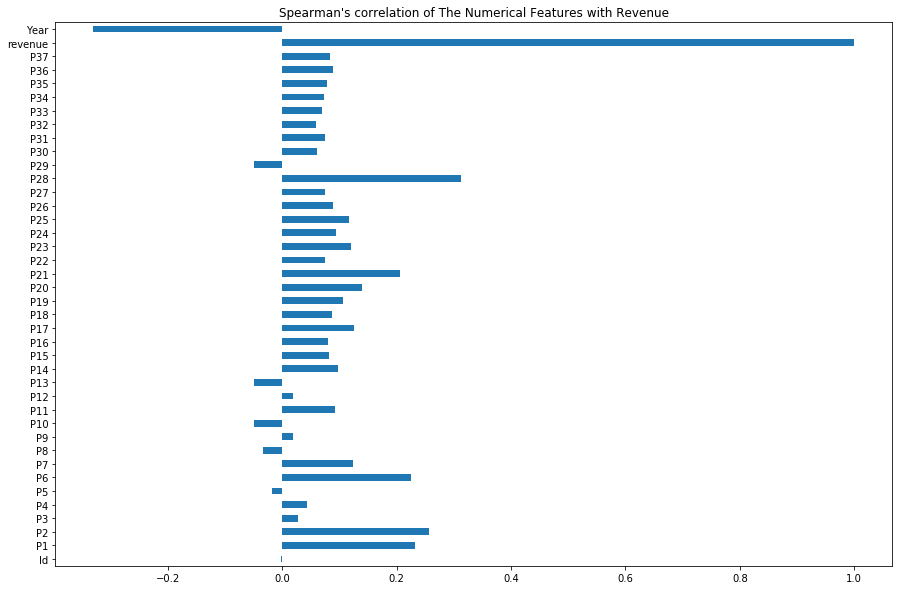

In [142]:
traindfDsc.corr('spearman')['revenue'].plot.barh(figsize=(15,10), title="Spearman's correlation of The Numerical Features with Revenue")

#### With the Spearman Correlation, the year and some of the numerical features have negative correlations with the revenue

In [97]:
traindfDsc['revenue'].skew()

2.7934786951625044

In [98]:
traindfDsc['revenue'].kurtosis()

12.055176638707392

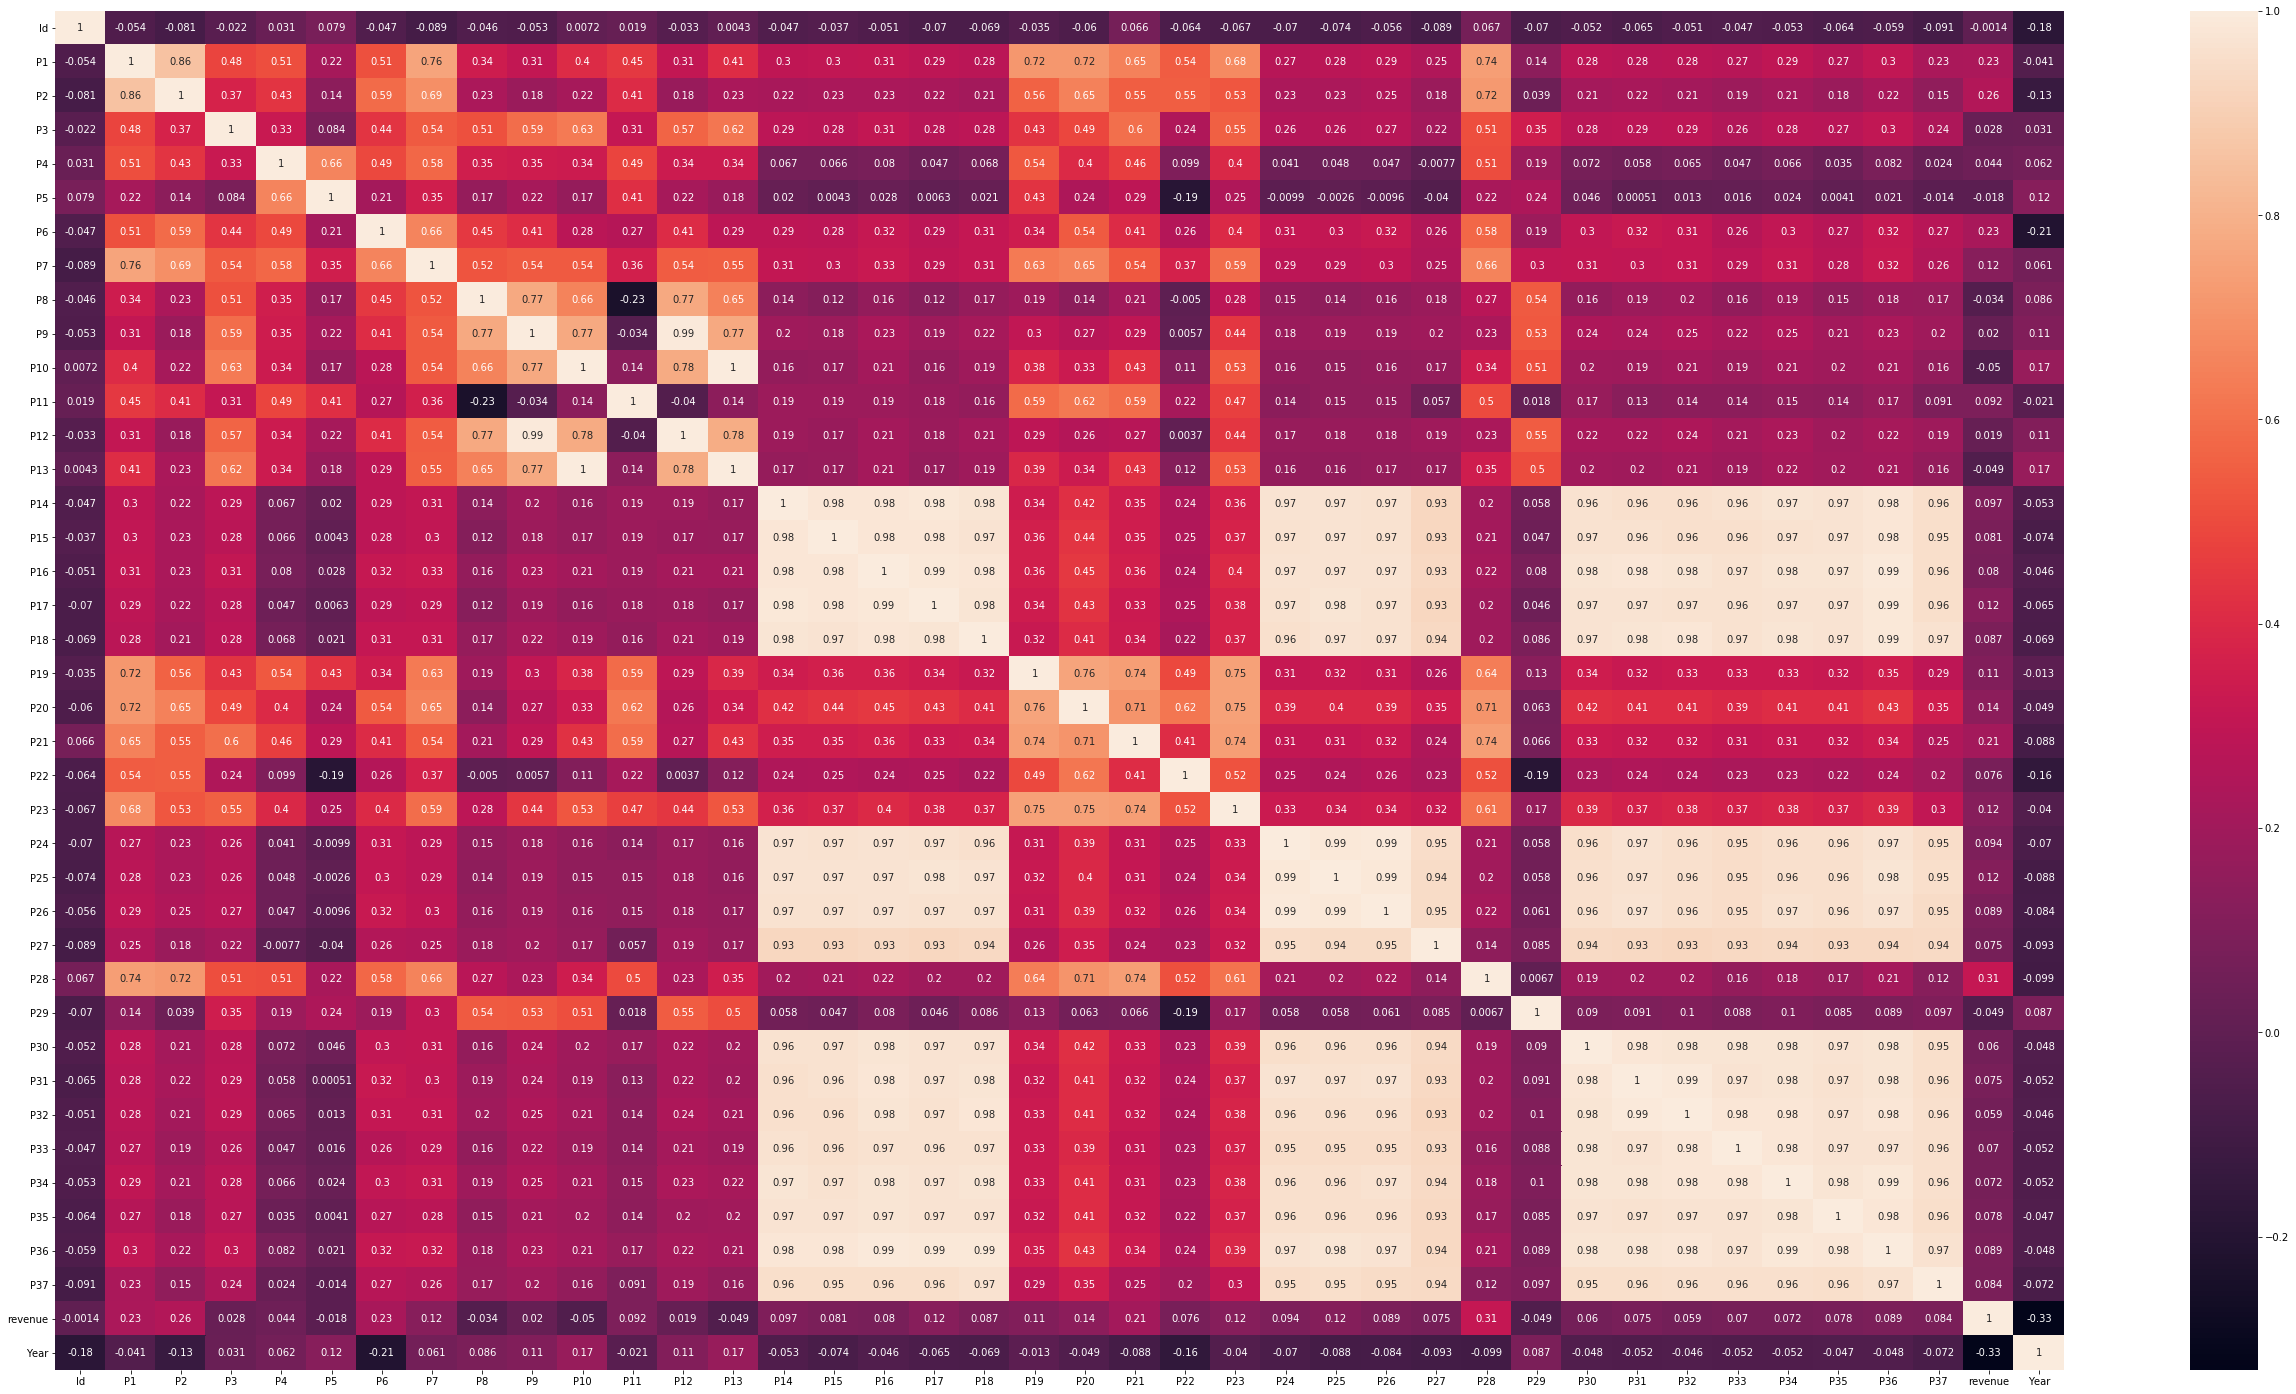

In [26]:
plt.figure(figsize=(45,25))
sns.heatmap(traindf.corr('spearman'),annot=True)

In [27]:
testdf =pd.read_csv('C:\\Users\\USER\\jupyter_docs\\restaurant_revenue_prediction\\Data\\test.csv')
testdf

Id   Open Date            City  City Group Type  P1   P2   P3   P4  \
0          0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   
1          1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   
2          2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   
3          3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   
4          4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   
...      ...         ...             ...         ...  ...  ..  ...  ...  ...   
99995  99995  01/05/2000         Antalya       Other   FC   5  5.0  4.0  4.0   
99996  99996  07/18/2011           Niğde       Other   IL   1  2.0  4.0  3.0   
99997  99997  12/29/2012        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   
99998  99998  10/12/2013        İstanbul  Big Cities   FC  12  7.5  6.0  6.0   
99999  99999  10/05/2010        İstanbul  Big Cities   IL   2  5.0  4.0  4.0   

       P5  ...  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0       1  ...  2.0  3.0    0    0    0    0    0    0    0    0  
1       2  ...  1.0  3.0    0    0    0    0    0    0    0    0  
2       2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
3       2  ...  2.0  3.0    0    4    0    0    0    0    0    0  
4       1  ...  5.0  3.0    0    0    0    0    0    0    0    0  
...    ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
99995   2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
99996   1  ...  1.0  3.0    5    0    0    0    4    0    0    0  
99997   1  ...  4.0  1.0    5    5    3    2    4    4    4    2  
99998   4  ...  7.5  5.0    0    0    0    4    0    0    0    0  
99999   2  ...  5.0  3.0    0    2    0    2    2    4    2    0  

[100000 rows x 42 columns]

In [28]:
#testdf.describe()
#testdf.info()
#testdf.corr()
#testdf.isnull().any()
#testdf.dtypes


In [29]:
testdf.columns.unique()

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [30]:
testdf['Open Date'] = pd.to_datetime(testdf['Open Date'])
#testdf['Open Date'].nunique()
testdf['Year'] = testdf['Open Date'].apply(lambda x:x.year)
testdf['Year'].nunique()

20

In [31]:
px.histogram(testdf, x="Type", color="City Group")

In [32]:
px.histogram(testdf, x="City", color="Type")